In [3]:
from PyPDF2 import PdfMerger

def merge_pdfs(pdf_list, output_filename):
    """
    Merges multiple PDF files into a single PDF.

    Args:
        pdf_list (list): List of PDF file paths to merge.
        output_filename (str): Path to the output merged PDF file.
    """
    merger = PdfMerger()

    try:
        for pdf in pdf_list:
            merger.append(pdf)
            print(f"Added: {pdf}")
        
        merger.write(output_filename)
        print(f"Merged PDF saved as: {output_filename}")
    except Exception as e:
        print(f"An error occurred: {e}")
    finally:
        merger.close()

# Example usage:
if __name__ == "__main__":
    # List of PDF files to merge
    pdf_files = ["/Users/ammaster10/Documents/SIIT/Me/PawarisPanyasombat_CV.pdf", "/Users/ammaster10/Documents/SIIT/Me/1Page.pdf"]  
    # Output merged PDF file
    output_file = "merged.pdf"  
    
    merge_pdfs(pdf_files, output_file)


Added: /Users/ammaster10/Documents/SIIT/Me/PawarisPanyasombat_CV.pdf
Added: /Users/ammaster10/Documents/SIIT/Me/1Page.pdf
Merged PDF saved as: merged.pdf


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis

# ชื่อไฟล์มึง
filepath = "/Users/ammaster10/Documents/Github/Year3/supply_chain_data copy.xlsx"


data =pd.read_excel(filepath, sheet_name='in')

product_sold =data['Number of products sold']
costs = data['Costs']

# Calculate kurtosis
kurt_product_sold = kurtosis(product_sold)
kurt_costs = kurtosis(costs)

# Plotting
plt.figure(figsize=(10, 5))

# Plot for product sold
plt.subplot(1, 2, 1)
sns.histplot(product_sold, kde=True)
plt.title(f'Product Sold\nKurtosis: {kurt_product_sold:.2f}')

# Plot for costs
plt.subplot(1, 2, 2)
sns.histplot(costs, kde=True)
plt.title(f'Costs\nKurtosis: {kurt_costs:.2f}')

plt.tight_layout()
plt.show()

KeyError: 'Number of product sold'

In [5]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return round(1 / (1 + np.exp(-z)), 4)

# Dataset
D = [([0, 0], 0), ([0, 1], 1), ([1, 0], 1), ([1, 1], 1)]

# Initial weights and bias
w = np.array([2.25, -3.4])  # w1, w2
b = 2.45  # bias

# Learning rate
eta = 0.1

# Compute gradients for one sample
def compute_gradients(x, y, w, b):
    z = np.dot(w, x) + b  # Linear combination
    y_hat = sigmoid(z)    # Sigmoid activation
    error = y_hat - y      # Error
    # Gradients with respect to weights and bias
    dw = error * y_hat * (1 - y_hat) * np.array(x)
    db = error * y_hat * (1 - y_hat)
    return np.round(dw, 4), round(db, 4), round(y_hat, 4), round(error, 4)

# (a) Batch Gradient Descent
def batch_gradient_descent(D, w, b, eta):
    total_dw = np.zeros_like(w)
    total_db = 0
    print("\n--- Batch Gradient Descent ---")
    for x, y in D:
        dw, db, y_hat, error = compute_gradients(x, y, w, b)
        total_dw += dw
        total_db += db
        print(f"Data: {x}, Target: {y}, Sigmoid: {y_hat}, Error: {error}, Gradient(w): {dw}, Gradient(b): {db}")
    # Update weights and bias
    w -= eta * total_dw
    b -= eta * total_db
    return np.round(w, 4), round(b, 4)

# (b) Stochastic Gradient Descent
def stochastic_gradient_descent(D, w, b, eta):
    print("\n--- Stochastic Gradient Descent ---")
    for x, y in D:
        dw, db, y_hat, error = compute_gradients(x, y, w, b)
        print(f"Data: {x}, Target: {y}, Sigmoid: {y_hat}, Error: {error}, Gradient(w): {dw}, Gradient(b): {db}")
        w -= eta * dw
        b -= eta * db
        print(f"Weight: {w}, Bias: {b}")
    return np.round(w, 4), round(b, 4)

# (c) Mini-Batch Gradient Descent
def mini_batch_gradient_descent(D, w, b, eta, batch_size=2):
    np.random.shuffle(D)
    print("\n--- Mini-Batch Gradient Descent ---")
    for i in range(0, len(D), batch_size):
        batch = D[i:i+batch_size]
        total_dw = np.zeros_like(w)
        total_db = 0
        for x, y in batch:
            dw, db, y_hat, error = compute_gradients(x, y, w, b)
            total_dw += dw
            total_db += db
            print(f"Data: {x}, Target: {y}, Sigmoid: {y_hat}, Error: {error}, Gradient(w): {dw}, Gradient(b): {db}")
        # Update weights and bias for the batch
        w -= eta * total_dw
        b -= eta * total_db

        
        
    return np.round(w, 4), round(b, 4)

# Run one iteration
print("Initial weights:", w)
print("Initial bias:", b)

# Batch Gradient Descent
w_batch, b_batch = batch_gradient_descent(D, w.copy(), b, eta)
print("\nAfter Batch Gradient Descent:")
print("Weights:", w_batch)
print("Bias:", b_batch)

# Stochastic Gradient Descent
w_sgd, b_sgd = stochastic_gradient_descent(D, w.copy(), b, eta)
print("\nAfter Stochastic Gradient Descent:")
print("Weights:", w_sgd)
print("Bias:", b_sgd)

# Mini-Batch Gradient Descent
w_mini, b_mini = mini_batch_gradient_descent(D, w.copy(), b, eta, batch_size=2)
print("\nAfter Mini-Batch Gradient Descent:")
print("Weights:", w_mini)
print("Bias:", b_mini)


Initial weights: [ 2.25 -3.4 ]
Initial bias: 2.45

--- Batch Gradient Descent ---
Data: [0, 0], Target: 0, Sigmoid: 0.9206, Error: 0.9206, Gradient(w): [0. 0.], Gradient(b): 0.0673
Data: [0, 1], Target: 1, Sigmoid: 0.2789, Error: -0.7211, Gradient(w): [-0.    -0.145], Gradient(b): -0.145
Data: [1, 0], Target: 1, Sigmoid: 0.991, Error: -0.009, Gradient(w): [-0.0001 -0.    ], Gradient(b): -0.0001
Data: [1, 1], Target: 1, Sigmoid: 0.7858, Error: -0.2142, Gradient(w): [-0.0361 -0.0361], Gradient(b): -0.0361

After Batch Gradient Descent:
Weights: [ 2.2536 -3.3819]
Bias: 2.4614

--- Stochastic Gradient Descent ---
Data: [0, 0], Target: 0, Sigmoid: 0.9206, Error: 0.9206, Gradient(w): [0. 0.], Gradient(b): 0.0673
Weight: [ 2.25 -3.4 ], Bias: 2.44327
Data: [0, 1], Target: 1, Sigmoid: 0.2775, Error: -0.7225, Gradient(w): [-0.     -0.1449], Gradient(b): -0.1449
Weight: [ 2.25    -3.38551], Bias: 2.45776
Data: [1, 0], Target: 1, Sigmoid: 0.9911, Error: -0.0089, Gradient(w): [-0.0001 -0.    ], Gra

In [3]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Dataset
D = [([1, 0], 1), ([0, 1], 1), ([0, 0], 0), ([1, 1], 1)]

# Initial weights and bias
w = np.array([0.05, 0.1])  # w1, w2
b = -0.09  # bias

# Learning rate
eta = 0.1

# Compute gradients for one sample
def compute_gradients(x, y, w, b):
    z = np.dot(w, x) + b  # Linear combination
    y_hat = sigmoid(z)    # Sigmoid activation
    error = y_hat - y      # Error
    # Gradients with respect to weights and bias
    dw = error * y_hat * (1 - y_hat) * np.array(x)
    db = error * y_hat * (1 - y_hat)
    return np.round(dw, 4), round(db, 4), round(y_hat, 4), round(error, 4)

# Stochastic Gradient Descent with Detailed Output
def stochastic_gradient_descent(D, w, b, eta):
    print("\n--- Stochastic Gradient Descent ---")
    for i, (x, y) in enumerate(D):
        dw, db, y_hat, error = compute_gradients(x, y, w, b)
        print(f"Example {i+1}: x = {x}, y = {y}")
        print(f"  z = {np.dot(w, x) + b:.4f}")
        print(f"  Sigmoid (ŷ) = {y_hat}")
        print(f"  Error (ŷ - y) = {error}")
        print(f"  Gradients: ∂L/∂w1 = {dw[0]}, ∂L/∂w2 = {dw[1]}, ∂L/∂b = {db}")
        # Update weights and bias
        w -= eta * dw
        b -= eta * db
        print(f"  Updated Weights: w1 = {w[0]:.4f}, w2 = {w[1]:.4f}")
        print(f"  Updated Bias: b = {b:.4f}\n")
    return np.round(w, 4), round(b, 4)

# Run one iteration
print("Initial weights:", w)
print("Initial bias:", b)

# Perform Stochastic Gradient Descent
w_sgd, b_sgd = stochastic_gradient_descent(D, w.copy(), b, eta)

print("Final Weights and Bias:")
print("Weights:", w_sgd)
print("Bias:", b_sgd)


Initial weights: [0.05 0.1 ]
Initial bias: -0.09

--- Stochastic Gradient Descent ---
Example 1: x = [1, 0], y = 1
  z = -0.0400
  Sigmoid (ŷ) = 0.49
  Error (ŷ - y) = -0.51
  Gradients: ∂L/∂w1 = -0.1274, ∂L/∂w2 = -0.0, ∂L/∂b = -0.1274
  Updated Weights: w1 = 0.0627, w2 = 0.1000
  Updated Bias: b = -0.0773

Example 2: x = [0, 1], y = 1
  z = 0.0227
  Sigmoid (ŷ) = 0.5057
  Error (ŷ - y) = -0.4943
  Gradients: ∂L/∂w1 = -0.0, ∂L/∂w2 = -0.1236, ∂L/∂b = -0.1236
  Updated Weights: w1 = 0.0627, w2 = 0.1124
  Updated Bias: b = -0.0649

Example 3: x = [0, 0], y = 0
  z = -0.0649
  Sigmoid (ŷ) = 0.4838
  Error (ŷ - y) = 0.4838
  Gradients: ∂L/∂w1 = 0.0, ∂L/∂w2 = 0.0, ∂L/∂b = 0.1208
  Updated Weights: w1 = 0.0627, w2 = 0.1124
  Updated Bias: b = -0.0770

Example 4: x = [1, 1], y = 1
  z = 0.0981
  Sigmoid (ŷ) = 0.5245
  Error (ŷ - y) = -0.4755
  Gradients: ∂L/∂w1 = -0.1186, ∂L/∂w2 = -0.1186, ∂L/∂b = -0.1186
  Updated Weights: w1 = 0.0746, w2 = 0.1242
  Updated Bias: b = -0.0651

Final Weights an

In [7]:
import numpy as np

# Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Derivative of sigmoid
def sigmoid_derivative(z):
    return sigmoid(z) * (1 - sigmoid(z))

# Parameters (from the problem)
W1 = np.array([[1.5, 2.4, 2.0],
               [-2.5, 1.7, 3.2],
               [2.8, 1.1, -2.0]])  # Weights for layer 1

b1 = np.array([2.4, 1.8, -3.5])  # Biases for layer 1

W2 = np.array([-2.3, 1.7, -1.1])  # Weights for layer 2
b2 = 2.8  # Bias for layer 2

# Input and target output
x = np.array([1, 1, 1])  # Input sample
y = 0  # Target output

# Learning rate
eta = 0.5

# Forward pass
def forward_pass(x, W1, b1, W2, b2):
    # Layer 1
    z1 = np.dot(W1, x) + b1  # Linear combination
    a1 = sigmoid(z1)         # Activation (a1 = [a1_1, a1_2, a1_3])

    # Layer 2
    z2 = np.dot(W2, a1) + b2  # Linear combination
    y_hat = sigmoid(z2)       # Activation (output)

    return z1, a1, z2, y_hat

# Backward pass and weight updates
def backpropagation(x, y, W1, b1, W2, b2, eta):
    # Forward pass
    z1, a1, z2, y_hat = forward_pass(x, W1, b1, W2, b2)

    # Output layer error and gradients
    error_output = y_hat - y
    dL_dz2 = error_output * sigmoid_derivative(z2)  # Gradient of loss w.r.t. z2

    dL_dW2 = dL_dz2 * a1  # Gradient of loss w.r.t. W2
    dL_db2 = dL_dz2       # Gradient of loss w.r.t. b2

    # Hidden layer errors and gradients
    dL_da1 = W2 * dL_dz2  # Error propagated to hidden layer
    dL_dz1 = dL_da1 * sigmoid_derivative(z1)  # Gradient of loss w.r.t. z1

    dL_dW1 = np.outer(dL_dz1, x)  # Gradient of loss w.r.t. W1
    dL_db1 = dL_dz1               # Gradient of loss w.r.t. b1

    # Update weights and biases
    W1 -= eta * dL_dW1
    b1 -= eta * dL_db1
    W2 -= eta * dL_dW2
    b2 -= eta * dL_db2

    return W1, b1, W2, b2, a1, y_hat, dL_dW1, dL_db1, dL_dW2, dL_db2

# Perform one iteration of backpropagation
print("Initial W1:", W1)
print("Initial b1:", b1)
print("Initial W2:", W2)
print("Initial b2:", b2)

W1, b1, W2, b2, a1, y_hat, grad_W1, grad_b1, grad_W2, grad_b2 = backpropagation(x, y, W1, b1, W2, b2, eta)

# Display results
print("\nHidden Layer Activations (a1):", np.round(a1, 4))
print("Predicted Output (ŷ):", np.round(y_hat, 4))

print("\nGradients for Layer 1:")
print("dL/dW1:", np.round(grad_W1, 4))
print("dL/db1:", np.round(grad_b1, 4))

print("\nGradients for Layer 2:")
print("dL/dW2:", np.round(grad_W2, 4))
print("dL/db2:", np.round(grad_b2, 4))

print("\nUpdated W1:", np.round(W1, 4))
print("Updated b1:", np.round(b1, 4))
print("Updated W2:", np.round(W2, 4))
print("Updated b2:", np.round(b2, 4))


Initial W1: [[ 1.5  2.4  2. ]
 [-2.5  1.7  3.2]
 [ 2.8  1.1 -2. ]]
Initial b1: [ 2.4  1.8 -3.5]
Initial W2: [-2.3  1.7 -1.1]
Initial b2: 2.8

Hidden Layer Activations (a1): [0.9998 0.9852 0.168 ]
Predicted Output (ŷ): 0.8798

Gradients for Layer 1:
dL/dW1: [[-0.0001 -0.0001 -0.0001]
 [ 0.0023  0.0023  0.0023]
 [-0.0143 -0.0143 -0.0143]]
dL/db1: [-0.0001  0.0023 -0.0143]

Gradients for Layer 2:
dL/dW2: [0.093  0.0917 0.0156]
dL/db2: 0.093

Updated W1: [[ 1.5     2.4     2.    ]
 [-2.5012  1.6988  3.1988]
 [ 2.8072  1.1072 -1.9928]]
Updated b1: [ 2.4     1.7988 -3.4928]
Updated W2: [-2.3465  1.6542 -1.1078]
Updated b2: 2.7535


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 1. Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the data
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

# 2. Define the Autoencoder
encoding_dim = 32  # Size of the encoded representations

# Input layer
input_img = Input(shape=(784,))

# Encoder
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_img, decoded)

# Encoder model for extracting features
encoder = Model(input_img, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# 3. Train the Autoencoder
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# 4. Extract features from the encoder
encoded_features = encoder.predict(x_train)

# 5. Use KMeans for unsupervised classification
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(encoded_features)

# Map KMeans cluster labels to actual digits
def map_clusters_to_labels(kmeans_labels, true_labels):
    label_mapping = {}
    for cluster in np.unique(kmeans_labels):
        cluster_indices = np.where(kmeans_labels == cluster)[0]
        most_common_label = np.bincount(true_labels[cluster_indices]).argmax()
        label_mapping[cluster] = most_common_label
    return np.vectorize(label_mapping.get)(kmeans_labels)

# Map the clusters to labels
cluster_labels = map_clusters_to_labels(kmeans.labels_, y_train)

# 6. Evaluate the unsupervised classification accuracy
accuracy = accuracy_score(y_train, cluster_labels)
print(f"Unsupervised Classification Accuracy: {accuracy:.2f}")

# 7. Visualize original and reconstructed images
decoded_imgs = autoencoder.predict(x_test)

n = 10  # Number of digits to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.axis('off')

plt.show()


In [ ]:
/Users/ammaster10/Downloads/OCT2017

In [2]:
import os
from collections import defaultdict

# Assuming 'OCT2017/train' is inside the dataset

path = "/Users/ammaster10/Downloads/OCT2017"
train_dir = os.path.join(path,  "train")

# Initialize count dictionary
category_counts = defaultdict(int)

# Loop through each category folder
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        image_count = len(os.listdir(category_path))
        category_counts[category] = image_count

# Print the results
print("Image counts per category (train set):")
for category, count in category_counts.items():
    print(f"{category}: {count}")


Image counts per category (train set):
CNV: 13692
DME: 11348
DRUSEN: 8616
NORMAL: 14532


In [3]:
from PIL import Image
import os

# Set path to train folder (or combine with test/val if needed)
train_dir = os.path.join(path, "train")

total_width = 0
total_height = 0
image_count = 0

# Loop through categories and images
for category in os.listdir(train_dir):
    category_path = os.path.join(train_dir, category)
    if os.path.isdir(category_path):
        for img_name in os.listdir(category_path):
            img_path = os.path.join(category_path, img_name)
            try:
                with Image.open(img_path) as img:
                    width, height = img.size
                    total_width += width
                    total_height += height
                    image_count += 1
            except:
                print(f"Skipped: {img_path}")

# Calculate average
if image_count > 0:
    avg_width = total_width / image_count
    avg_height = total_height / image_count
    print(f"Average image size: {avg_width:.2f} x {avg_height:.2f}")
else:
    print("No images found.")


Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6714512-4.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6714357-2.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6707726-6.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6714829-6.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6714357-3.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6714512-5.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-672619-1.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6714829-1.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6705343-1.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6728091-1.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6707726-1.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2017/train/NORMAL/NORMAL-6732486-2.jpeg
Skipped: /Users/ammaster10/Downloads/OCT2

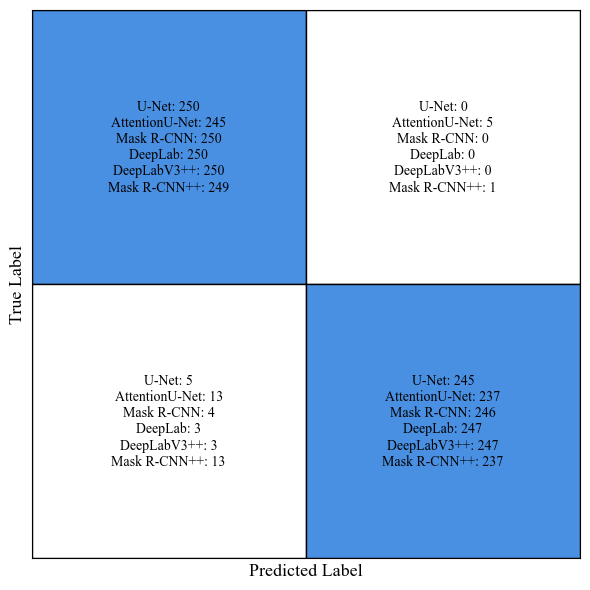

In [2]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Set font
plt.rcParams['font.family'] = 'Times New Roman'

# Confusion matrix data with DeepLab and Mask R-CNN swapped
labels = [
    ['U-Net: 250\nAttentionU-Net: 245\nMask R-CNN: 250\nDeepLab: 250\nDeepLabV3++: 250\nMask R-CNN++: 249', 
     'U-Net: 0\nAttentionU-Net: 5\nMask R-CNN: 0\nDeepLab: 0\nDeepLabV3++: 0\nMask R-CNN++: 1'],
    ['U-Net: 5\nAttentionU-Net: 13\nMask R-CNN: 4\nDeepLab: 3\nDeepLabV3++: 3\nMask R-CNN++: 13', 
     'U-Net: 245\nAttentionU-Net: 237\nMask R-CNN: 246\nDeepLab: 247\nDeepLabV3++: 247\nMask R-CNN++: 237']
]

fig, ax = plt.subplots(figsize=(6, 6))

# Color mapping
colors = [['#4A90E2', 'white'], ['white', '#4A90E2']]

# Draw squares and labels
for i in range(2):
    for j in range(2):
        rect = patches.Rectangle((j, 1 - i), 1, 1, facecolor=colors[i][j], edgecolor='black')
        ax.add_patch(rect)
        ax.text(j + 0.5, 1 - i + 0.5, labels[i][j], ha='center', va='center', fontsize=10)

# Axis labels
ax.set_xticks([0.5, 1.5])
ax.set_xticklabels(['CNV', 'No CNV'], fontsize=12)
ax.set_yticks([0.5, 1.5])
ax.set_yticklabels(['CNV', 'No CNV'], fontsize=12)
ax.set_xlabel('Predicted Label', fontsize=13)
ax.set_ylabel('True Label', fontsize=13)

# Formatting
ax.set_xlim(0, 2)
ax.set_ylim(0, 2)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
plt.tight_layout()
plt.show()

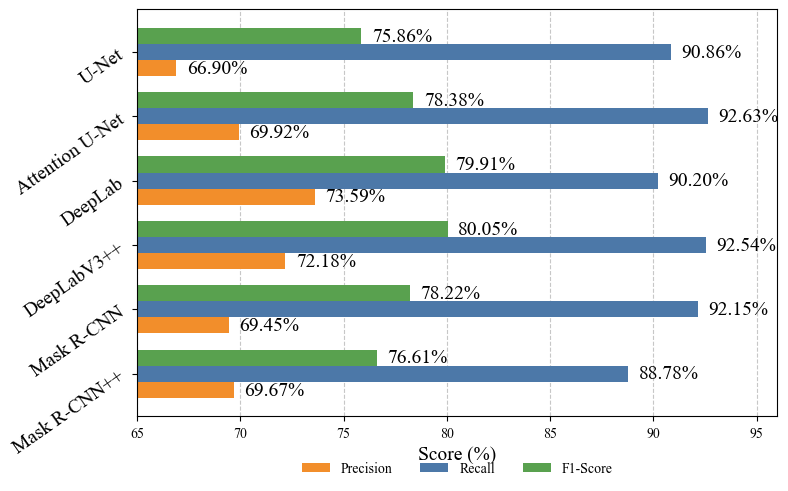

In [26]:
import matplotlib.pyplot as plt
import numpy as np

# Set font
plt.rcParams['font.family'] = 'Times New Roman'

# Data
models = ['U-Net', 'Attention U-Net', 'DeepLab', 'DeepLabV3++', 'Mask R-CNN', 'Mask R-CNN++']
precision = [66.90, 69.92, 73.59, 72.18, 69.45, 69.67]
f1_score =    [75.86, 78.38, 79.91, 80.05, 78.22, 76.61]
recall =  [90.86, 92.63, 90.20, 92.54, 92.15, 88.78]

# Reverse for horizontal plot
models = models[::-1]
precision = precision[::-1]
recall = recall[::-1]
f1_score = f1_score[::-1]

# Set bar width and position
bar_width = 0.25
index = np.arange(len(models))

# Plot bars
fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.barh(index, precision, bar_width, label='Precision', color='#F28E2B')
bars2 = ax.barh(index + bar_width, recall, bar_width, label='Recall', color='#4C78A8')
bars3 = ax.barh(index + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='#59A14F')

# Add values on bars
for bars in [bars1, bars2, bars3]:
    for bar in bars:
        width = bar.get_width()
        ax.text(width + 0.5, bar.get_y() + bar.get_height() / 2,
                f'{width:.2f}%', va='center', ha='left', fontsize=14)

# Axes and labels
ax.set_xlabel('Score (%)', fontsize=14)
ax.set_yticks(index + bar_width)
ax.set_yticklabels(models, fontsize=14,rotation=35)
ax.set_xlim(65, 96)
# Add legend in one line
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, fontsize=10, frameon=False)

# Add grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()

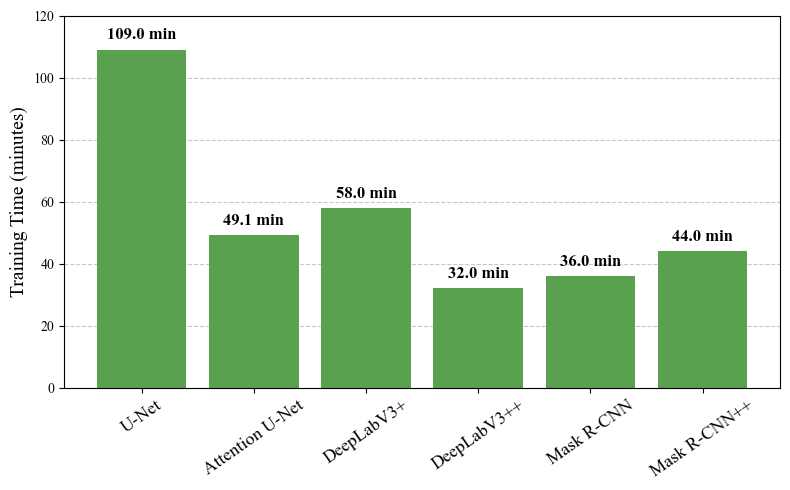

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Set font
plt.rcParams['font.family'] = 'Times New Roman'

# Data
models = ['U-Net', 'Attention U-Net', 'DeepLabV3+', 'DeepLabV3++', 'Mask R-CNN', 'Mask R-CNN++']
training_time = [109.0, 49.1, 58.0, 32.0, 36.0, 44.0]

# Plot vertical bars (no need to reverse for vertical plotting)
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(models, training_time, color="#59A14F")

# Annotate bars with training time
for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2, height + 2,
                        f'{height:.1f} min', ha='center', va='bottom', fontsize=12, fontweight='bold')

# Labels and styling
ax.set_ylabel('Training Time (minutes)', fontsize=14)
ax.set_ylim(0, 120)
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

# Set x-tick labels with rotation for better fit
plt.xticks(fontsize=13, rotation=35)

plt.tight_layout()
plt.show()


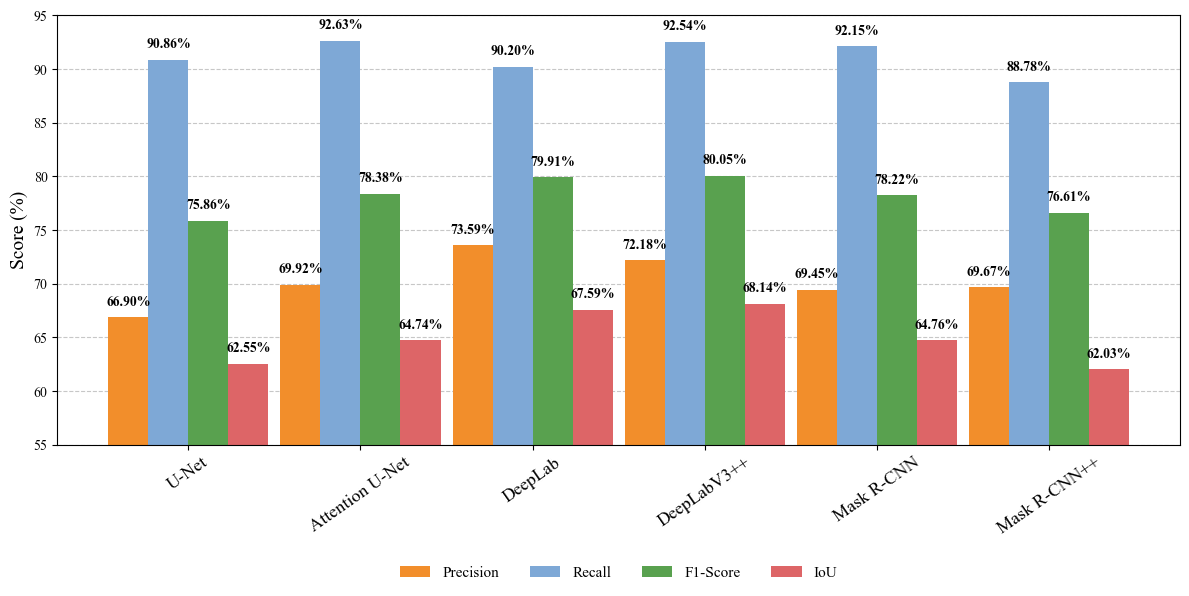

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Set font
plt.rcParams['font.family'] = 'Times New Roman'

# Data
models = ['U-Net', 'Attention U-Net', 'DeepLab', 'DeepLabV3++', 'Mask R-CNN', 'Mask R-CNN++']
precision = [66.90, 69.92, 73.59, 72.18, 69.45, 69.67]
f1_score = [75.86, 78.38, 79.91, 80.05, 78.22, 76.61]
recall = [90.86, 92.63, 90.20, 92.54, 92.15, 88.78]
iou = [62.55, 64.74, 67.59, 68.14, 64.76, 62.03]

# Reverse order for consistent visual
# models = models[::-1]
# precision = precision[::-1]
# recall = recall[::-1]
# f1_score = f1_score[::-1]
# iou = iou[::-1]

# Bar config
bar_width = 0.35
index = np.arange(len(models)) * (bar_width * 4.3)

fig, ax = plt.subplots(figsize=(12, 6))

# Bars
bars1 = ax.bar(index, precision, bar_width, label='Precision', color='#F28E2B')
bars2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color="#7EA8D6")
bars3 = ax.bar(index + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='#59A14F')
bars4 = ax.bar(index + 3 * bar_width, iou, bar_width, label='IoU', color="#DD6567")

# X-axis
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(models, rotation=35, fontsize=13)

# Add text labels
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height + 0.8,
                f'{height:.2f}%', ha='center', va='bottom', fontsize=9.8, fontweight='bold')

# Axis labels
ax.set_ylabel('Score (%)', fontsize=14)
ax.set_ylim(55, 95)

# Grid + legend
ax.yaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), ncol=4, fontsize=11, frameon=False)

# Layout fixes
plt.tight_layout()
plt.subplots_adjust(bottom=0.25)  # More space for model names and legend

plt.show()

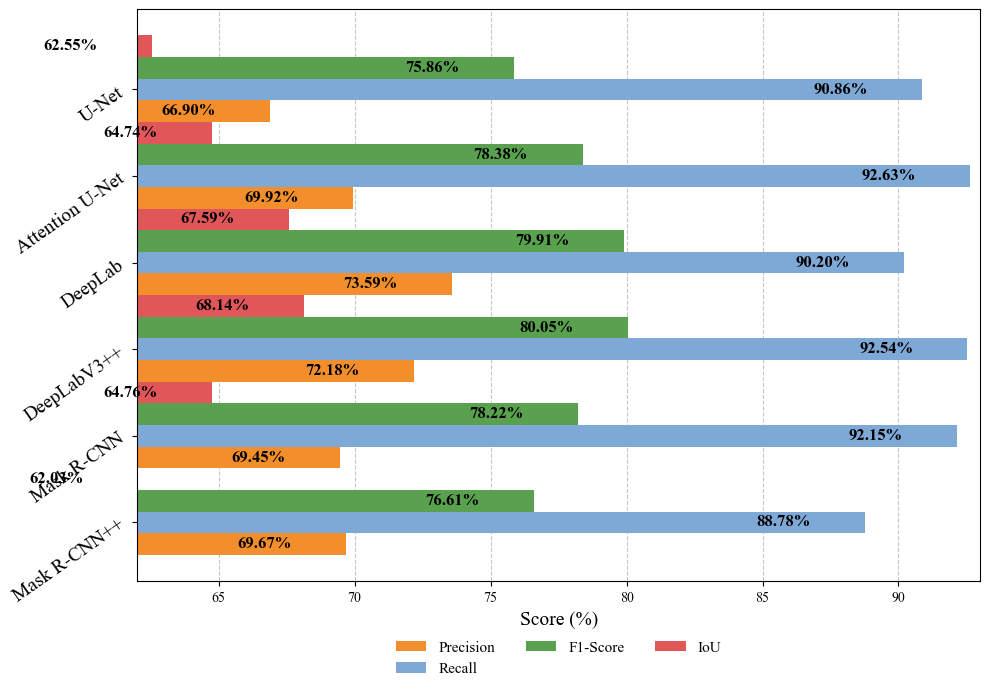

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Set font
plt.rcParams['font.family'] = 'Times New Roman'

# Data
models = ['U-Net', 'Attention U-Net', 'DeepLab', 'DeepLabV3++', 'Mask R-CNN', 'Mask R-CNN++']
precision = [66.90, 69.92, 73.59, 72.18, 69.45, 69.67]
f1_score = [75.86, 78.38, 79.91, 80.05, 78.22, 76.61]
recall = [90.86, 92.63, 90.20, 92.54, 92.15, 88.78]
Iou = [62.55,64.74,67.59,68.14,64.76,62.03]

# Reverse for horizontal plot
models = models[::-1]
precision = precision[::-1]
recall = recall[::-1]
f1_score = f1_score[::-1]
Iou = Iou[::-1]

# Set bar width and position (increase bar height by reducing spacing)
bar_width = 0.25
# Update bar positions with spacing for 4 bars
index = np.arange(len(models)) * (bar_width * 4)  # space out each group

# Plot bars (now properly spaced)
fig, ax = plt.subplots(figsize=(10, 7))
bars1 = ax.barh(index, precision, bar_width, label='Precision', color='#F28E2B')
bars2 = ax.barh(index + bar_width, recall, bar_width, label='Recall', color="#7EA8D6")
bars3 = ax.barh(index + 2 * bar_width, f1_score, bar_width, label='F1-Score', color='#59A14F')
bars4 = ax.barh(index + 3 * bar_width, Iou, bar_width, label='IoU', color='#E15759')

# Set y-ticks to the middle of the 4 bars per group
ax.set_yticks(index + 1.5 * bar_width)
ax.set_yticklabels(models, fontsize=14, rotation=35)
# Add values inside right edge of bars
for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        width = bar.get_width()
        ax.text(width - 2, bar.get_y() + bar.get_height() / 2,
            f'{width:.2f}%', va='center', ha='right', fontsize=12, color='black', fontweight='bold')

# Axes and labels
ax.set_xlabel('Score (%)', fontsize=14)
ax.set_yticks(index + bar_width)
ax.set_yticklabels(models, fontsize=14, rotation=35)
ax.set_xlim(62, 93)

# Legend
ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.08), ncol=3, fontsize=11, frameon=False)

# Grid
ax.xaxis.grid(True, linestyle='--', alpha=0.7)
ax.set_axisbelow(True)

plt.tight_layout()
plt.show()